# Análise dos relatórios de auditoria

#### UFPB - Universidade Federal da Paraíba
#### Gestão Pública
Autores: Bruno Souza da Costa e Cecília Lori de Medeiros Cruz

bruno.souza@dcx.ufpb.br    
cecilia.medeiros@dcx.ufpb.br

### Primeiramente é importado o .CSV referente à tabela com os dados dos critérios de auditoria

Serão realizadas diversas análises com a finalidade de representar melhor os dados e responder às seguintes questões:

- Quantos e qual a porcentagem dos casos por unidade da federação?
- Quantos e qual a porcentagem dos casos por tipo do relatório?
- Quantos e qual a porcentagem dos casos pelo ano de publicação do relatório?
- Quantos e qual a porcentagem dos casos por região?
- Quantos e qual a porcentagem dos casos mensais de cada ano?
- Qual a porcentagem dos critérios por unidade da federação?
- Qual a porcentagem dos critérios por tipo do relatório?
- Qual a porcentagem dos critérios por ano de publicação do relatório?
- Qual a porcentagem dos critérios por região?
- Qual a porcentagem dos critérios mensalmente de cada ano?
- Qual a porcentagem de correlação entre esses critérios?

## 0. Preparando o Dataset
Nesse tópico iremos preparar os dados que serão estudados nesta análise.

### 0.1 Importando bibliotecas

In [238]:
import pandas as pd
import seaborn as sns
sns.set(style="white")
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### 0.2 Criando Dataset

In [239]:
tabela_relatorios = pd.read_csv("relatorios.csv", keep_default_na=False ,sep = ",", header = 0, encoding = 'utf8')
pd.set_option('display.max_columns', None)

renomear_colunas = ['ID','Nome','Serviço','Grupo','Ação','Avaliação','Data','Ano','Governo','UF','Matriz de Achados?','a. Questões de Auditoria','b. Subquestões de Auditoria','c. Descrição sumária','d. Critério (O que deveria ser)','e. Condição ou situação encontrada (O que é) [achados]','f. Evidências','g. Informação extraída das evidências','h. Causas','i. Efeitos','j. Boas Práticas','k. Recomendações','l. Benefícios esperados','m. Manifestação','n. Conclusões','Filtro']
tabela_relatorios.columns = renomear_colunas

tabela_relatorios.to_csv("relatorios.csv", index=False, encoding='utf8')

In [240]:
tabela_relatorios = tabela_relatorios.drop(tabela_relatorios.columns[-1], axis=1)

### 0.3 Realizando tratamento das tabelas de valores booleanos

## 1. Casos por Unidade da Federação
Aqui analisaremos a quantidade de casos por estados.

In [241]:
tabela_relatorios['UF'] = tabela_relatorios['UF'].astype(str)

#Tabela apenas com os relatórios do Acre
# Filtra a tabela para incluir apenas linhas onde a coluna 'UF' é exatamente "1"
tabela_acre_bool = tabela_relatorios['UF'] == "1"
tabela_acre = tabela_relatorios[tabela_acre_bool]
tabela_acre_count = len(tabela_acre.index)

#display(tabela_acre_count)
#display(tabela_acre.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Alagoas
tabela_alagoas_bool = tabela_relatorios['UF'] == "2" #booleano categoriza apenas quando é do Alagoas
tabela_alagoas = tabela_relatorios[tabela_alagoas_bool]
tabela_alagoas_count = len(tabela_alagoas.index)
#display(tabela_alagoas_count)
#display(tabela_alagoas.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Amazonas
tabela_amazonas_bool = tabela_relatorios['UF'] == "3" #booleano categoriza apenas quando é do Amazonas
tabela_amazonas = tabela_relatorios[tabela_amazonas_bool]
tabela_amazonas_count = len(tabela_amazonas.index)
#display(tabela_amazonas_count)
#display(tabela_amazonas.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Amapá
tabela_amapa_bool = tabela_relatorios['UF'] == "4" #booleano categoriza apenas quando é do Amapá
tabela_amapa = tabela_relatorios[tabela_amapa_bool]
tabela_amapa_count = len(tabela_amapa.index)
#display(tabela_amapa_count)
#display(tabela_amapa.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios da Bahia
tabela_bahia_bool = tabela_relatorios['UF'] == "5" #booleano categoriza apenas quando é da Bahia
tabela_bahia = tabela_relatorios[tabela_bahia_bool]
tabela_bahia_count = len(tabela_bahia.index)
#display(tabela_bahia_count)
#display(tabela_bahia.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Ceará
tabela_ceara_bool = tabela_relatorios['UF'] == "6" #booleano categoriza apenas quando é do Ceará
tabela_ceara = tabela_relatorios[tabela_ceara_bool]
tabela_ceara_count = len(tabela_ceara.index)
#display(tabela_ceara_count)
#display(tabela_ceara.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Distrito Federal
tabela_df_bool = tabela_relatorios['UF'] == "7" #booleano categoriza apenas quando é do Distrito Federal
tabela_df = tabela_relatorios[tabela_df_bool]
tabela_df_count = len(tabela_df.index)
#display(tabela_df_count)
#display(tabela_df.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Espírito Santo
tabela_es_bool = tabela_relatorios['UF'] == "8" #booleano categoriza apenas quando é do Espírito Santo
tabela_es = tabela_relatorios[tabela_es_bool]
tabela_es_count = len(tabela_es.index)
#display(tabela_es_count)
#display(tabela_es.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Goiás
tabela_goias_bool = tabela_relatorios['UF'] == "9" #booleano categoriza apenas quando é de Goiás
tabela_goias = tabela_relatorios[tabela_goias_bool]
tabela_goias_count = len(tabela_goias.index)
#display(tabela_goias_count)
#display(tabela_goias.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Maranhão
tabela_maranhao_bool = tabela_relatorios['UF']== "10" #booleano categoriza apenas quando é do Maranhão
tabela_maranhao = tabela_relatorios[tabela_maranhao_bool]
tabela_maranhao_count = len(tabela_maranhao.index)
#display(tabela_maranhao_count)
#display(tabela_maranhao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Minas Gerais
tabela_mg_bool = tabela_relatorios['UF'] == "11" #booleano categoriza apenas quando é de Minas Gerais
tabela_mg = tabela_relatorios[tabela_mg_bool]
tabela_mg_count = len(tabela_mg.index)
#display(tabela_mg_count)
#display(tabela_mg.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Mato Grosso do Sul
tabela_ms_bool = tabela_relatorios['UF'] == "12" #booleano categoriza apenas quando é do Mato Grosso do Sul
tabela_ms = tabela_relatorios[tabela_ms_bool]
tabela_ms_count = len(tabela_ms.index)
#display(tabela_ms_count)
#display(tabela_ms.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Mato Grosso
tabela_mt_bool = tabela_relatorios['UF'] == "13"#booleano categoriza apenas quando é do Mato Grosso
tabela_mt = tabela_relatorios[tabela_mt_bool]
tabela_mt_count = len(tabela_mt.index)
#display(tabela_mt_count)
#display(tabela_mt.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Pará
tabela_para_bool = tabela_relatorios['UF'] == "14"#booleano categoriza apenas quando é do Pará
tabela_para = tabela_relatorios[tabela_para_bool]
tabela_para_count = len(tabela_para.index)
#display(tabela_para_count)
#display(tabela_para.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios da Paraíba
tabela_paraiba_bool = tabela_relatorios['UF'] == "15"#booleano categoriza apenas quando é da Paraíba
tabela_paraiba = tabela_relatorios[tabela_paraiba_bool]
tabela_paraiba_count = len(tabela_paraiba.index)
#display(tabela_paraiba_count)
#display(tabela_paraiba.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Pernambuco
tabela_pernambuco_bool = tabela_relatorios['UF'] == "16"#booleano categoriza apenas quando é de Pernambuco
tabela_pernambuco = tabela_relatorios[tabela_pernambuco_bool]
tabela_pernambuco_count = len(tabela_pernambuco.index)
#display(tabela_pernambuco_count)
#display(tabela_pernambuco.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Piauí
tabela_piaui_bool = tabela_relatorios['UF'] == "17"#booleano categoriza apenas quando é do Piauí
tabela_piaui = tabela_relatorios[tabela_piaui_bool]
tabela_piaui_count = len(tabela_piaui.index)
#display(tabela_piaui_count)
#display(tabela_piaui.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Paraná
tabela_parana_bool = tabela_relatorios['UF'] == "18"#booleano categoriza apenas quando é do Paraná
tabela_parana = tabela_relatorios[tabela_parana_bool]
tabela_parana_count = len(tabela_parana.index)
#display(tabela_parana_count)
#display(tabela_parana.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Rio de Janeiro
tabela_rj_bool = tabela_relatorios['UF'] == "19"#booleano categoriza apenas quando é do Rio de Janeiro
tabela_rj = tabela_relatorios[tabela_rj_bool]
tabela_rj_count = len(tabela_rj.index)
#display(tabela_rj_count)
#display(tabela_rj.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Rio Grande do Norte
tabela_rn_bool = tabela_relatorios['UF'] == "20"#booleano categoriza apenas quando é do Rio Grande do Norte
tabela_rn = tabela_relatorios[tabela_rn_bool]
tabela_rn_count = len(tabela_rn.index)
#display(tabela_rn_count)
#display(tabela_rn.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Rio Grande do Sul
tabela_rs_bool = tabela_relatorios['UF'] == "21"#booleano categoriza apenas quando é do Rio Grande do Sul
tabela_rs = tabela_relatorios[tabela_rs_bool]
tabela_rs_count = len(tabela_rs.index)
#display(tabela_rs_count)
#display(tabela_rs.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Rondônia
tabela_rondonia_bool = tabela_relatorios['UF'] == "22"#booleano categoriza apenas quando é de Rondônia
tabela_rondonia = tabela_relatorios[tabela_rondonia_bool]
tabela_rondonia_count = len(tabela_rondonia.index)
#display(tabela_rondonia_count)
#display(tabela_rondonia.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Roraima
tabela_roraima_bool = tabela_relatorios['UF'] == "23"#booleano categoriza apenas quando é de Roraima
tabela_roraima = tabela_relatorios[tabela_roraima_bool]
tabela_roraima_count = len(tabela_roraima.index)
#display(tabela_roraima_count)
#display(tabela_roraima.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Santa Catarina
tabela_sc_bool = tabela_relatorios['UF'] == "24"#booleano categoriza apenas quando é de Santa Catarina
tabela_sc = tabela_relatorios[tabela_sc_bool]
tabela_sc_count = len(tabela_sc.index)
#display(tabela_sc_count)
#display(tabela_sc.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Sergipe
tabela_sergipe_bool = tabela_relatorios['UF'] == "25"#booleano categoriza apenas quando é de Sergipe
tabela_sergipe = tabela_relatorios[tabela_sergipe_bool]
tabela_sergipe_count = len(tabela_sergipe.index)
#display(tabela_sergipe_count)
#display(tabela_sergipe.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de São Paulo
tabela_sp_bool = tabela_relatorios['UF'] == "26"#booleano categoriza apenas quando é de São Paulo
tabela_sp = tabela_relatorios[tabela_sp_bool]
tabela_sp_count = len(tabela_sp.index)
#display(tabela_sp_count)
#display(tabela_sp.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Tocantins
tabela_tocantins_bool = tabela_relatorios['UF'] == "27"#booleano categoriza apenas quando é de Tocantins
tabela_tocantins = tabela_relatorios[tabela_tocantins_bool]
tabela_tocantins_count = len(tabela_tocantins.index)
#display(tabela_tocantins_count)
#display(tabela_tocantins.head(10)) #Exibe amostra da tabela para saber se está tudo ok

qtd_total_relatórios = len(tabela_relatorios.index) #Número total de relatórios
# Lista contendo a lista de estados
array_estados = ["Acre", "Alagoas", "Amazonas", "Amapá", "Bahia", "Ceará", "Distrito Federal", "Espírito Santo", "Goiás", "Maranhão", "Minas Gerais", "Mato Grosso do Sul", "Mato Grosso", "Pará", "Paraíba", "Pernambuco", "Piauí", "Paraná", "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima", "Santa Catarina", "Sergipe", "São Paulo", "Tocantins"]
#Lista contendo a quantidade de relatórios por estado
array_quantidades_estados = [tabela_acre_count, tabela_alagoas_count, tabela_amazonas_count, tabela_amapa_count, tabela_bahia_count, tabela_ceara_count, tabela_df_count, tabela_es_count, tabela_goias_count, tabela_maranhao_count, tabela_mg_count, tabela_ms_count, tabela_mt_count, tabela_para_count, tabela_paraiba_count, tabela_pernambuco_count, tabela_piaui_count, tabela_parana_count, tabela_rj_count, tabela_rn_count, tabela_rs_count, tabela_rondonia_count, tabela_roraima_count, tabela_sc_count, tabela_sergipe_count, tabela_sp_count, tabela_tocantins_count]
#Lista contendo a porcentagem de relatórios por estado
array_porcentagens_estados = [round(((tabela_acre_count/qtd_total_relatórios)*100), 2), round(((tabela_alagoas_count/qtd_total_relatórios)*100), 2), round(((tabela_amazonas_count/qtd_total_relatórios)*100), 2), round(((tabela_amapa_count/qtd_total_relatórios)*100), 2), round(((tabela_bahia_count/qtd_total_relatórios)*100), 2), round(((tabela_ceara_count/qtd_total_relatórios)*100), 2), round(((tabela_df_count/qtd_total_relatórios)*100), 2), round(((tabela_es_count/qtd_total_relatórios)*100), 2), round(((tabela_goias_count/qtd_total_relatórios)*100),2), round(((tabela_maranhao_count/qtd_total_relatórios)*100),2), round(((tabela_mg_count/qtd_total_relatórios)*100), 2), round(((tabela_ms_count/qtd_total_relatórios)*100), 2), round(((tabela_mt_count/qtd_total_relatórios)*100), 2), round(((tabela_para_count/qtd_total_relatórios)*100), 2), round(((tabela_paraiba_count/qtd_total_relatórios)*100), 2), round(((tabela_pernambuco_count/qtd_total_relatórios)*100), 2), round(((tabela_piaui_count/qtd_total_relatórios)*100), 2), round(((tabela_parana_count/qtd_total_relatórios)*100), 2), round(((tabela_rj_count/qtd_total_relatórios)*100), 2), round(((tabela_rn_count/qtd_total_relatórios)*100), 2), round(((tabela_rs_count/qtd_total_relatórios)*100), 2), round(((tabela_rondonia_count/qtd_total_relatórios)*100), 2), round(((tabela_roraima_count/qtd_total_relatórios)*100), 2), round(((tabela_sc_count/qtd_total_relatórios)*100), 2), round(((tabela_sergipe_count/qtd_total_relatórios)*100), 2), round(((tabela_sp_count/qtd_total_relatórios)*100), 2), round(((tabela_tocantins_count/qtd_total_relatórios)*100), 2)]

#Tabela que mostra a porcentagem de relatórios por estado e sua quantidade
tabela_porcentagem_estado = pd.DataFrame({'Estado': array_estados+["Total"], 'Quantidade de relatórios': array_quantidades_estados+[qtd_total_relatórios], 'Porcentagem (%)': array_porcentagens_estados+["100"]})

tabela_porcentagem_estado.to_excel('casos_por_estado.xlsx')

display(tabela_porcentagem_estado)

,Estado,Quantidade de relatórios,Porcentagem (%)
0,Acre,61,1.05
1,Alagoas,90,1.55
2,Amazonas,60,1.03
3,Amapá,48,0.83
4,Bahia,254,4.38
5,Ceará,169,2.91
6,Distrito Federal,1153,19.86
7,Espírito Santo,172,2.96
8,Goiás,270,4.65
9,Maranhão,65,1.12


### Gráfico 1.1

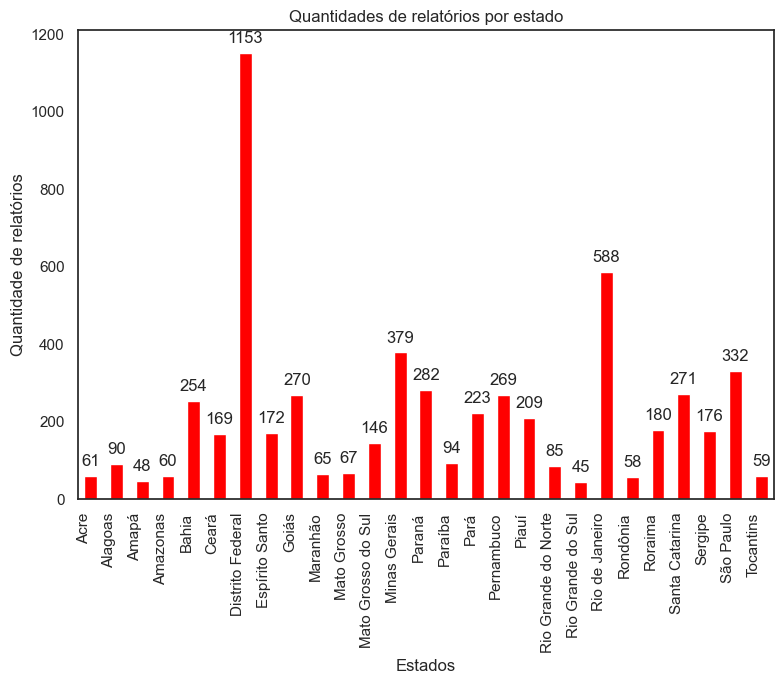

In [242]:
#Removendo a barra que representa o total de relatórios do dataset
tabela_filtrada = tabela_porcentagem_estado[tabela_porcentagem_estado['Estado'] != 'Total']

#Selecionando os dados que serão apresentados no gráfico
grafico_estado_relatorio = tabela_filtrada.groupby('Estado')['Quantidade de relatórios'].mean()

#decidindo o tamanho do gráfico
plt.figure(figsize=(8, 7))

#ajustando o modelo do gráfico, cor das barras, título e nomes dos eixos x e y
ax = grafico_estado_relatorio.plot(kind='bar', color='red')
ax.set_xlabel('Estados')
ax.set_ylabel('Quantidade de relatórios')
ax.set_title('Quantidades de relatórios por estado')
#Seleciona a posição que deverá ficar os nomes dos tipos de relatório

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

#Adiciona acima da barra a quantidade de relatórios que a mesma representa
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
# Salva o gráfico como um arquivo JPEG
plt.savefig('quantidade_relatorios_por_estado.jpeg', format='jpeg', bbox_inches='tight')

#Exibe o gráfico
plt.show()

## 2. Casos por Tipo de Relatório
Aqui será analisado a quantidade de cada tipo de relatório.

In [243]:
tabela_relatorios['Serviço'] = tabela_relatorios['Serviço'].astype(str)

#Tabela apenas com os relatórios do tipo Avaliação
tabela_relatorios_avaliacao_bool = tabela_relatorios['Serviço'].str.contains("1", case=False, na=False) #booleano categoriza apenas quando é do tipo Avaliação
tabela_relatorios_avaliacao = tabela_relatorios[tabela_relatorios_avaliacao_bool]
tabela_relatorios_avaliacao_count = len(tabela_relatorios_avaliacao.index)
#display(tabela_relatorios_avaliacao_count)
#display(tabela_relatorios_avaliacao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do tipo Consultoria
tabela_relatorios_consultoria_bool = tabela_relatorios['Serviço'].str.contains("2", case=False, na=False) #booleano categoriza apenas quando é do tipo Consultoria
tabela_relatorios_consultoria = tabela_relatorios[tabela_relatorios_consultoria_bool]
tabela_relatorios_consultoria_count = len(tabela_relatorios_consultoria.index)
#display(tabela_relatorios_consultoria_count)
#display(tabela_relatorios_consultoria.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do tipo Apuração
tabela_relatorios_apuracao_bool = tabela_relatorios['Serviço'].str.contains("3", case=False, na=False) #booleano categoriza apenas quando é do tipo Apuração
tabela_relatorios_apuracao = tabela_relatorios[tabela_relatorios_apuracao_bool]
tabela_relatorios_apuracao_count = len(tabela_relatorios_apuracao.index)
#display(tabela_relatorios_apuracao_count)
#display(tabela_relatorios_apuracao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela com os relatórios que não se aplicam a nenhum dos tipos
tabela_relatorios_nao_se_aplicam = pd.concat([tabela_relatorios,tabela_relatorios_avaliacao, tabela_relatorios_consultoria, tabela_relatorios_apuracao]).drop_duplicates(keep=False)
tabela_relatorios_nao_se_aplicam_count = len(tabela_relatorios_nao_se_aplicam.index)
#display(tabela_relatorios_nao_se_aplicam_count)
#display(tabela_relatorios_nao_se_aplicam.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Quantidade de relatórios por tipo, respectivamente
array_quantidades_tipos = [tabela_relatorios_avaliacao_count, tabela_relatorios_consultoria_count, tabela_relatorios_apuracao_count, tabela_relatorios_nao_se_aplicam_count]
#Tipos respectivos de relatório
array_tipo_relatorio = ["Avaliação", "Consultoria", "Apuração", "Não se aplica"]
#Porcentagens por tipo de relatório
array_porcentagens_tipos_relatorios = [round(((tabela_relatorios_avaliacao_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_consultoria_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_apuracao_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_nao_se_aplicam_count/qtd_total_relatórios)*100), 2)]

#Tabela com as quantidades e tipos de relatórios
tabela_tipo_relatorio = pd.DataFrame({'Tipo do Relatório': array_tipo_relatorio, 'Quantidade de relatórios': array_quantidades_tipos, 'Porcentagem (%)': array_porcentagens_tipos_relatorios})

tabela_tipo_relatorio.to_excel('casos_por_tipo.xlsx')

#Desenha a tabela
display(tabela_tipo_relatorio)

,Tipo do Relatório,Quantidade de relatórios,Porcentagem (%)
0,Avaliação,4743,81.71
1,Consultoria,1028,17.71
2,Apuração,34,0.59
3,Não se aplica,0,0.00


É notório que "avaliação" é o tipo de relatório que mais foi publicado, sendo tendo um percentual de 80

### Gráfico 2.1

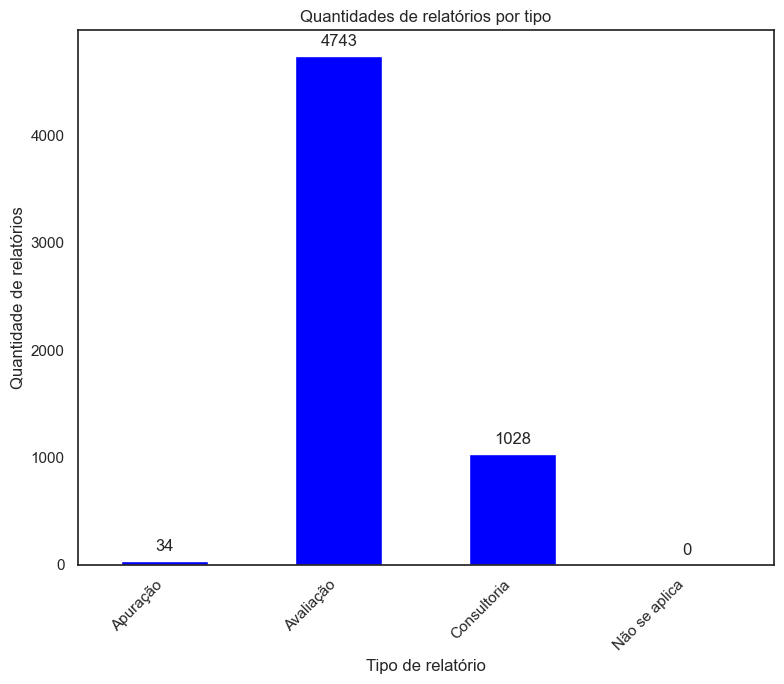

In [244]:
#Selecionando os dados que serão apresentados no gráfico
grafico_tipo_relatorio = tabela_tipo_relatorio.groupby('Tipo do Relatório')['Quantidade de relatórios'].mean()

#decidindo o tamanho do gráfico
plt.figure(figsize=(8, 7))

#ajustando o modelo do gráfico, cor das barras, título e nomes dos eixos x e y
ax = grafico_tipo_relatorio.plot(kind='bar', color='blue')

ax.set_xlabel('Tipo de relatório')
ax.set_ylabel('Quantidade de relatórios')
ax.set_title('Quantidades de relatórios por tipo')

#Seleciona a posição que deverá ficar os nomes dos tipos de relatório
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Adiciona acima da barra a quantidade de relatórios que a mesma representa
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
# Salva o gráfico como um arquivo JPEG
plt.savefig('quantidade_relatorios_por_tipo.jpeg', format='jpeg', bbox_inches='tight')
#Exibe o gráfico
plt.show()

## 3. Casos por Ano do Relatório
Nesse tópico será analisado a quantidade de relatórios publicados ao longo dos anos.

In [245]:
tabela_relatorios['Ano'] = tabela_relatorios['Ano'].astype(str)

tabela_relatorios_2018_bool = tabela_relatorios['Ano'].str.contains("2018", case=False, na=False) #booleano categoriza apenas quando é do ano de 2018
tabela_relatorios_2018 = tabela_relatorios[tabela_relatorios_2018_bool]
tabela_relatorios_2018_count = len(tabela_relatorios_2018.index)
#display(tabela_relatorios_avaliacao_count)
#display(tabela_relatorios_avaliacao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2019_bool = tabela_relatorios['Ano'].str.contains("2019", case=False, na=False) #booleano categoriza apenas quando é do ano de 2019
tabela_relatorios_2019 = tabela_relatorios[tabela_relatorios_2019_bool]
tabela_relatorios_2019_count = len(tabela_relatorios_2019.index)
#display(tabela_relatorios_avaliacao_count)
#display(tabela_relatorios_avaliacao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2020_bool = tabela_relatorios['Ano'].str.contains("2020", case=False, na=False) #booleano categoriza apenas quando é do ano de 2020
tabela_relatorios_2020 = tabela_relatorios[tabela_relatorios_2020_bool]
tabela_relatorios_2020_count = len(tabela_relatorios_2020.index)
#display(tabela_relatorios_avaliacao_count)
#display(tabela_relatorios_avaliacao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2021_bool = tabela_relatorios['Ano'].str.contains("2021", case=False, na=False) #booleano categoriza apenas quando é do ano de 2021
tabela_relatorios_2021 = tabela_relatorios[tabela_relatorios_2021_bool]
tabela_relatorios_2021_count = len(tabela_relatorios_2021.index)
#display(tabela_relatorios_avaliacao_count)
#display(tabela_relatorios_avaliacao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2022_bool = tabela_relatorios['Ano'].str.contains("2022", case=False, na=False) #booleano categoriza apenas quando é do ano de 2022
tabela_relatorios_2022 = tabela_relatorios[tabela_relatorios_2022_bool]
tabela_relatorios_2022_count = len(tabela_relatorios_2022.index)
#display(tabela_relatorios_consultoria_count)
#display(tabela_relatorios_consultoria.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2023_bool = tabela_relatorios['Ano'].str.contains("2023", case=False, na=False) #booleano categoriza apenas quando é do ano de 2023
tabela_relatorios_2023 = tabela_relatorios[tabela_relatorios_2023_bool]
tabela_relatorios_2023_count = len(tabela_relatorios_2023.index)
#display(tabela_relatorios_apuracao_count)
#display(tabela_relatorios_apuracao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2024_bool = tabela_relatorios['Ano'].str.contains("2024", case=False, na=False) #booleano categoriza apenas quando é do ano de 2024
tabela_relatorios_2024 = tabela_relatorios[tabela_relatorios_2024_bool]
tabela_relatorios_2024_count = len(tabela_relatorios_2024.index)
#display(tabela_relatorios_apuracao_count)
#display(tabela_relatorios_apuracao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Quantidade de relatórios por ano, respectivamente
array_quantidades_anos = [tabela_relatorios_2018_count, tabela_relatorios_2019_count, tabela_relatorios_2020_count, tabela_relatorios_2021_count, tabela_relatorios_2022_count, tabela_relatorios_2023_count, tabela_relatorios_2024_count]
#Anos respectivos de relatório
array_ano_relatorio = ['2018','2019','2020','2021', '2022', '2023', '2024']
#Porcentagens por ano de relatório
array_porcentagens_anos_relatorios = [round(((tabela_relatorios_2018_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_2019_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_2020_count/qtd_total_relatórios)*100), 2),round(((tabela_relatorios_2021_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_2022_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_2023_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_2024_count/qtd_total_relatórios)*100), 2)]

#Tabela com as quantidades e anos de relatórios
tabela_ano_relatorio = pd.DataFrame({'Ano do relatório': array_ano_relatorio, 'Quantidade de relatórios': array_quantidades_anos, 'Porcentagem (%)': array_porcentagens_anos_relatorios})

tabela_ano_relatorio.to_excel('casos_por_ano.xlsx')

#Desenha a tabela
display(tabela_ano_relatorio)

,Ano do relatório,Quantidade de relatórios,Porcentagem (%)
0,2018,1875,32.30
1,2019,1260,21.71
2,2020,682,11.75
3,2021,667,11.49
4,2022,541,9.32
5,2023,522,8.99
6,2024,258,4.44


### Gráfico 3.1

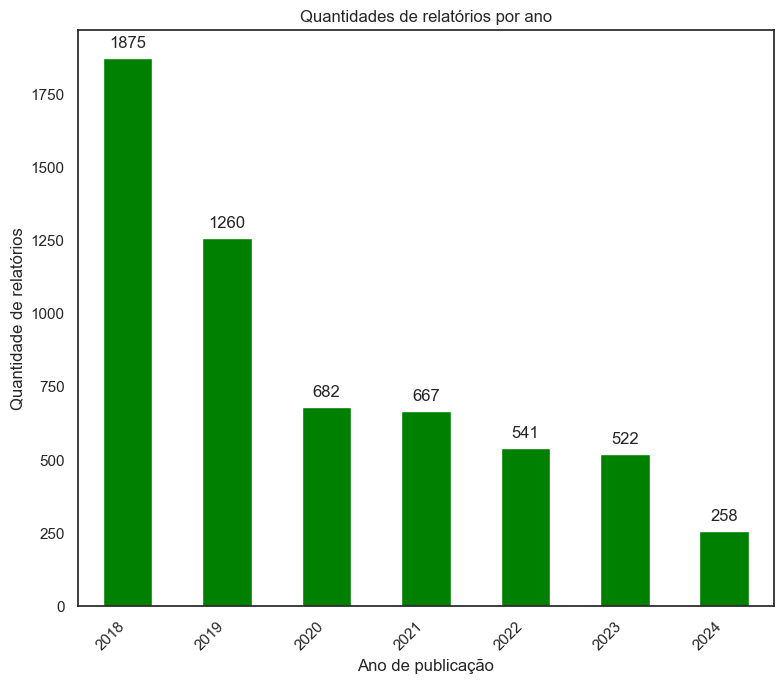

In [246]:
#Selecionando os dados que serão apresentados no gráfico
grafico_ano_relatorio = tabela_ano_relatorio.groupby('Ano do relatório')['Quantidade de relatórios'].mean()

#decidindo o tamanho do gráfico
plt.figure(figsize=(8, 7))

#ajustando o modelo do gráfico, cor das barras, título e nomes dos eixos x e y
ax = grafico_ano_relatorio.plot(kind='bar', color='green')
ax.set_xlabel('Ano de publicação')
ax.set_ylabel('Quantidade de relatórios')
ax.set_title('Quantidades de relatórios por ano')

#Seleciona a posição que deverá ficar os anos dos relatório
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Adiciona acima da barra a quantidade de relatórios que a mesma representa
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
# Salva o gráfico como um arquivo JPEG
plt.savefig('quantidade_relatorios_por_ano.jpeg', format='jpeg', bbox_inches='tight')

#Exibe o gráfico
plt.show()

## 4. Critérios por estado
Aqui veremos quais critérios estão mais presentes em cada estado do país.

In [247]:
array_criterios = ["Matriz", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]

# Definindo a função para calcular as porcentagens dos critérios
def porcentagem_criterios_estado(tabela_relatorios_estado):
    qtd_relatorios_estado = len(tabela_relatorios_estado.index)
    porcentagens_por_criterio = pd.Series(index=array_criterios, dtype='float64')

    # Adiciona cada critério ao Series com o cálculo de porcentagem
    for criterio, coluna in zip(array_criterios, [
        "Matriz de Achados?",
        "a. Questões de Auditoria",
        "b. Subquestões de Auditoria",
        "c. Descrição sumária",
        "d. Critério (O que deveria ser)",
        "e. Condição ou situação encontrada (O que é) [achados]",
        "f. Evidências",
        "g. Informação extraída das evidências",
        "h. Causas",
        "i. Efeitos",
        "j. Boas Práticas",
        "k. Recomendações",
        "l. Benefícios esperados",
        "m. Manifestação",
        "n. Conclusões"]):

        tabela_criterio_bool = tabela_relatorios_estado[coluna] == 1
        criterio_count = len(tabela_relatorios_estado[tabela_criterio_bool].index)
        porcentagem_criterio = round(((criterio_count / qtd_relatorios_estado) * 100), 2)
        porcentagens_por_criterio[criterio] = porcentagem_criterio

    return porcentagens_por_criterio

# Lista dos estados (ou nomes das tabelas dos estados)
array_estados = ["Acre", "Alagoas", "Amazonas", "Amapá", "Bahia", "Ceará", "DF", "ES", "Goiás", "Maranhão", "MG", "MS", "MT", "Pará", "Paraíba", "Pernambuco", "Piauí", "Paraná", "RJ", "RN", "RS", "Rondônia", "Roraima", "SC", "Sergipe", "SP", "Tocantins"]

# Adicione suas tabelas aqui
array_tabelas_estados = [tabela_acre, tabela_alagoas, tabela_amazonas, tabela_amapa, tabela_bahia, tabela_ceara, tabela_df, tabela_es, tabela_goias, tabela_maranhao, tabela_mg, tabela_ms, tabela_mt, tabela_para, tabela_paraiba, tabela_pernambuco, tabela_piaui, tabela_parana, tabela_rj, tabela_rn, tabela_rs, tabela_rondonia, tabela_roraima, tabela_sc, tabela_sergipe, tabela_sp, tabela_tocantins]

# Calcular porcentagens para cada estado e para o total
porcentagem_criterios_estado_aux = [porcentagem_criterios_estado(tabela) for tabela in array_tabelas_estados]

# Adiciona a porcentagem do total (exemplo, você deve definir o cálculo correto do total se necessário)
porcentagem_total = porcentagem_criterios_estado(tabela_relatorios)
porcentagem_criterios_estado_aux.append(porcentagem_total)

# Adiciona "Total" ao final do índice
indice = array_estados + ["Total"]

# Cria o DataFrame
porcentagens_criterios_por_estado = pd.DataFrame(porcentagem_criterios_estado_aux, index=indice)

# Salva o DataFrame em um arquivo Excel
porcentagens_criterios_por_estado.to_excel('criterios_por_estado.xlsx')

# Exibe o DataFrame
display(porcentagens_criterios_por_estado.reset_index(names="Estados"))



,Estados,Matriz,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,Acre,0.00,32.79,3.28,83.61,63.93,96.72,93.44,50.82,55.74,19.67,4.92,65.57,16.39,59.02,98.36
1,Alagoas,0.00,50.00,21.11,82.22,62.22,96.67,94.44,73.33,54.44,7.78,3.33,72.22,13.33,70.00,100.00
2,Amazonas,0.00,31.67,0.00,80.00,58.33,96.67,70.00,46.67,43.33,6.67,3.33,45.00,10.00,60.00,95.00
3,Amapá,0.00,43.75,12.50,75.00,70.83,93.75,95.83,45.83,56.25,29.17,4.17,64.58,14.58,54.17,93.75
4,Bahia,0.00,15.75,4.72,78.74,50.79,99.21,87.40,51.18,31.89,23.62,5.12,35.04,14.17,53.94,95.28
5,Ceará,0.59,35.50,3.55,85.80,55.03,99.41,94.08,58.58,43.20,24.26,8.88,56.21,20.12,57.40,94.67
6,DF,0.78,49.52,11.97,93.15,74.59,96.53,92.54,51.00,53.60,32.78,20.73,85.95,29.40,54.47,96.62
7,ES,0.58,47.09,5.23,66.28,51.16,97.67,86.05,68.60,26.74,9.88,2.91,47.67,11.05,63.37,98.84
8,Goiás,0.00,44.44,5.19,86.30,40.00,95.56,87.04,56.67,34.07,18.15,2.59,43.33,10.74,53.70,99.63
9,Maranhão,0.00,10.77,0.00,80.00,52.31,93.85,92.31,55.38,29.23,16.92,3.08,40.00,16.92,43.08,93.85


## 5. Criterios por tipo
Nesse tópico veremos quais critérios estão mais presentes em cada tipo de relatório.

In [ ]:
array_criterios = ["Matriz", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]

def porcentagem_criterios_tipo(tabela_relatorios_tipo):
    qtd_relatorios_tipo = len(tabela_relatorios_tipo.index)
    porcentagens_por_criterio = pd.Series(index=array_criterios, dtype='float64')

    def calcular_porcentagem(count, total):
        return round((count / total) * 100, 2) if total > 0 else 0

    # Critério "Matriz de Achados?"
    tabela_criterio_matriz_bool = tabela_relatorios_tipo["Matriz de Achados?"] == 1
    criterio_matriz_count = len(tabela_relatorios_tipo[tabela_criterio_matriz_bool].index)
    porcentagens_por_criterio["Matriz"] = calcular_porcentagem(criterio_matriz_count, qtd_relatorios_tipo)

    # Critério "a. Questões de Auditoria"
    tabela_criterio_questoes_auditoria_bool = tabela_relatorios_tipo["a. Questões de Auditoria"] == 1
    criterio_questoes_auditoria_count = len(tabela_relatorios_tipo[tabela_criterio_questoes_auditoria_bool].index)
    porcentagens_por_criterio["A"] = calcular_porcentagem(criterio_questoes_auditoria_count, qtd_relatorios_tipo)

    # Critério "b. Subquestões de Auditoria"
    tabela_criterio_subquestoes_auditoria_bool = tabela_relatorios_tipo["b. Subquestões de Auditoria"] == 1
    criterio_subquestoes_auditoria_count = len(tabela_relatorios_tipo[tabela_criterio_subquestoes_auditoria_bool].index)
    porcentagens_por_criterio["B"] = calcular_porcentagem(criterio_subquestoes_auditoria_count, qtd_relatorios_tipo)

    # Continue aplicando o padrão acima para os demais critérios
    criterios_colunas = [
        ("C", "c. Descrição sumária"),
        ("D", "d. Critério (O que deveria ser)"),
        ("E", "e. Condição ou situação encontrada (O que é) [achados]"),
        ("F", "f. Evidências"),
        ("G", "g. Informação extraída das evidências"),
        ("H", "h. Causas"),
        ("I", "i. Efeitos"),
        ("J", "j. Boas Práticas"),
        ("K", "k. Recomendações"),
        ("L", "l. Benefícios esperados"),
        ("M", "m. Manifestação"),
        ("N", "n. Conclusões")
    ]

    for letra, coluna in criterios_colunas:
        tabela_criterio_bool = tabela_relatorios_tipo[coluna] == 1
        criterio_count = len(tabela_relatorios_tipo[tabela_criterio_bool].index)
        porcentagens_por_criterio[letra] = calcular_porcentagem(criterio_count, qtd_relatorios_tipo)

    return porcentagens_por_criterio

array_tabelas_tipo = [tabela_relatorios_avaliacao, tabela_relatorios_consultoria, tabela_relatorios_apuracao, tabela_relatorios_nao_se_aplicam]

porcentagem_criterios_tipo_aux = []

for tabela in array_tabelas_tipo:
    if tabela.empty:
        print("Tabela vazia encontrada, pulando...")
        porcentagem_criterios_tipo_aux.append(pd.Series(index=array_criterios, dtype='float64'))  # Adiciona série vazia
    else:
        porcentagem_criterios_tipo_aux.append(porcentagem_criterios_tipo(tabela))

porcentagens_criterios_por_tipo = pd.DataFrame(porcentagem_criterios_tipo_aux, index=array_tipo_relatorio)
porcentagens_criterios_por_tipo.to_excel('criterios_por_tipo.xlsx')

display(porcentagens_criterios_por_tipo.reset_index(names="Tipo de Relatório"))


ZeroDivisionError: division by zero

## 6. Critérios por Ano
Nesse tópico iremos investigar quais critérios estão mais presentes ao longo dos anos.

In [249]:
array_criterios = ["Matriz", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]

def porcentagem_criterios_ano(tabela_relatorios_ano):
    
    qtd_relatorios_ano = len(tabela_relatorios_ano.index)
    porcentagens_por_criterio = pd.Series(index=array_criterios, dtype='float64')
    
    #Quantidade do critério matriz de achados
    tabela_criterio_matriz_bool = tabela_relatorios_ano["Matriz de Achados?"]==1
    tabela_criterio_matriz = tabela_relatorios_ano[tabela_criterio_matriz_bool]
    criterio_matriz_count = len(tabela_criterio_matriz.index)
    porcentagem_criterio_matriz = round(((criterio_matriz_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["Matriz"] = porcentagem_criterio_matriz

    #Quantidade do critério questões auditoria
    tabela_criterio_questoes_auditoria_bool = tabela_relatorios_ano["a. Questões de Auditoria"]==1
    tabela_criterio_questoes_auditoria = tabela_relatorios_ano[tabela_criterio_questoes_auditoria_bool]
    criterio_questoes_auditoria_count = len(tabela_criterio_questoes_auditoria.index)
    porcentagem_criterio_questoes_auditoria = round(((criterio_questoes_auditoria_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["A"] = porcentagem_criterio_questoes_auditoria

    #Quantidade do critério subquestões auditoria
    tabela_criterio_subquestoes_auditoria_bool = tabela_relatorios_ano["b. Subquestões de Auditoria"]==1
    tabela_criterio_subquestoes_auditoria = tabela_relatorios_ano[tabela_criterio_subquestoes_auditoria_bool]
    criterio_subquestoes_auditoria_count = len(tabela_criterio_subquestoes_auditoria.index)
    porcentagem_criterio_subquestoes_auditoria = round(((criterio_subquestoes_auditoria_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["B"] = porcentagem_criterio_subquestoes_auditoria

    #Quantidade do critério c. Descrição sumária
    tabela_criterio_descricao_sumaria_bool = tabela_relatorios_ano["c. Descrição sumária"]==1
    tabela_criterio_descricao_sumaria = tabela_relatorios_ano[tabela_criterio_descricao_sumaria_bool]
    criterio_descricao_sumaria_count = len(tabela_criterio_descricao_sumaria.index)
    porcentagem_criterio_descricao_sumaria = round(((criterio_descricao_sumaria_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["C"] = porcentagem_criterio_descricao_sumaria

    #Quantidade do critério d. Critério (O que deveria ser)
    tabela_criterio_deveria_ser_bool = tabela_relatorios_ano["d. Critério (O que deveria ser)"]==1
    tabela_criterio_deveria_ser = tabela_relatorios_ano[tabela_criterio_deveria_ser_bool]
    criterio_deveria_ser_count = len(tabela_criterio_deveria_ser.index)
    porcentagem_criterio_deveria_ser = round(((criterio_deveria_ser_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["D"] = porcentagem_criterio_deveria_ser

    #Quantidade do critério e. Condição ou situação encontrada (O que é) [achados]
    tabela_criterio_achados_bool = tabela_relatorios_ano["e. Condição ou situação encontrada (O que é) [achados]"]==1
    tabela_criterio_achados = tabela_relatorios_ano[tabela_criterio_achados_bool]
    criterio_achados_count = len(tabela_criterio_achados.index)
    porcentagem_criterio_achados = round(((criterio_achados_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["E"] = porcentagem_criterio_achados

    #Quantidade do critério f. Evidências
    tabela_criterio_evidencias_bool = tabela_relatorios_ano["f. Evidências"]==1
    tabela_criterio_evidencias = tabela_relatorios_ano[tabela_criterio_evidencias_bool]
    criterio_evidencias_count = len(tabela_criterio_evidencias.index)
    porcentagem_criterio_evidencias = round(((criterio_evidencias_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["F"] = porcentagem_criterio_evidencias

    #Quantidade do critério g. Informação extraída das evidências
    tabela_criterio_info_evidencias_bool = tabela_relatorios_ano["g. Informação extraída das evidências"]==1
    tabela_criterio_info_evidencias = tabela_relatorios_ano[tabela_criterio_info_evidencias_bool]
    criterio_info_evidencias_count = len(tabela_criterio_info_evidencias.index)
    porcentagem_criterio_info_evidencias= round(((criterio_info_evidencias_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["G"] = porcentagem_criterio_info_evidencias
    
    #Quantidade do critério h. Causas
    tabela_criterio_causas_bool = tabela_relatorios_ano["h. Causas"]==1
    tabela_criterio_causas = tabela_relatorios_ano[tabela_criterio_causas_bool]
    criterio_causas_count = len(tabela_criterio_causas.index)
    porcentagem_criterio_causas = round(((criterio_causas_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["H"] = porcentagem_criterio_causas

    #Quantidade do critério i. Efeitos
    tabela_criterio_efeitos_bool = tabela_relatorios_ano["i. Efeitos"]==1
    tabela_criterio_efeitos = tabela_relatorios_ano[tabela_criterio_efeitos_bool]
    criterio_efeitos_count = len(tabela_criterio_efeitos.index)
    porcentagem_criterio_efeitos = round(((criterio_efeitos_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["I"] = porcentagem_criterio_efeitos

    #Quantidade do critério j. Boas Práticas
    tabela_criterio_boas_praticas_bool = tabela_relatorios_ano["j. Boas Práticas"]==1
    tabela_criterio_boas_praticas = tabela_relatorios_ano[tabela_criterio_boas_praticas_bool]
    criterio_boas_praticas_count = len(tabela_criterio_boas_praticas.index)
    porcentagem_criterio_boas_praticas = round(((criterio_boas_praticas_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["J"] = porcentagem_criterio_boas_praticas

    #Quantidade do critério k. Recomendações
    tabela_criterio_recomendacoes_bool = tabela_relatorios_ano["k. Recomendações"]==1
    tabela_criterio_recomendacoes = tabela_relatorios_ano[tabela_criterio_recomendacoes_bool]
    criterio_recomendacoes_count = len(tabela_criterio_recomendacoes.index)
    porcentagem_criterio_recomendacoes = round(((criterio_recomendacoes_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["K"] = porcentagem_criterio_recomendacoes

    #Quantidade do critério l. Benefícios esperados
    tabela_criterio_beneficios_bool = tabela_relatorios_ano["l. Benefícios esperados"]==1
    tabela_criterio_beneficios = tabela_relatorios_ano[tabela_criterio_beneficios_bool]
    criterio_beneficios_count = len(tabela_criterio_beneficios.index)
    porcentagem_criterio_beneficios = round(((criterio_beneficios_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["L"] = porcentagem_criterio_beneficios

    #Quantidade do critério m. Manifestação
    tabela_criterio_manifestacao_bool = tabela_relatorios_ano["m. Manifestação"]==1
    tabela_criterio_manifestacao = tabela_relatorios_ano[tabela_criterio_manifestacao_bool]
    criterio_manifestacao_count = len(tabela_criterio_manifestacao.index)
    porcentagem_criterio_manifestacao = round(((criterio_manifestacao_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["M"] = porcentagem_criterio_manifestacao

    #Quantidade do critério n. Conclusões
    tabela_criterio_conclusoes_bool = tabela_relatorios_ano["n. Conclusões"]==1
    tabela_criterio_conclusoes = tabela_relatorios_ano[tabela_criterio_conclusoes_bool]
    criterio_conclusoes_count = len(tabela_criterio_conclusoes.index)
    porcentagem_criterio_conclusoes = round(((criterio_conclusoes_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["N"] = porcentagem_criterio_conclusoes

    return porcentagens_por_criterio

array_tabelas_ano = [tabela_relatorios_2018, tabela_relatorios_2019, tabela_relatorios_2020, tabela_relatorios_2021, tabela_relatorios_2022, tabela_relatorios_2023, tabela_relatorios_2024]

porcentagem_criterios_ano_aux = []

for i in array_tabelas_ano:
    porcentagem_criterios_ano_aux.append(porcentagem_criterios_ano(i)) #Roda para todos os anos e adiciona à tabela auxiliar de porcentagem dos critérios


porcentagens_criterios_por_ano = pd.DataFrame(porcentagem_criterios_ano_aux, index=array_ano_relatorio)
porcentagens_criterios_por_ano.to_excel('criterios_por_ano.xlsx')


display(porcentagens_criterios_por_ano.reset_index(names="Ano do Relatório"))

,Ano do Relatório,Matriz,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,2018,0.05,24.37,6.72,60.96,45.65,99.52,89.97,85.28,37.81,0.59,0.91,42.88,0.91,70.77,99.20
1,2019,0.56,32.22,4.37,98.10,31.51,99.05,83.25,62.46,36.90,9.84,6.03,48.89,5.40,64.84,98.97
2,2020,0.44,49.85,4.69,99.27,45.16,99.71,80.65,64.37,37.10,12.61,12.32,59.68,6.16,70.67,99.56
3,2021,0.45,61.02,14.69,94.90,78.86,94.75,94.90,44.08,48.28,44.83,16.04,80.06,33.88,53.82,93.10
4,2022,0.37,62.29,9.98,97.60,83.92,90.76,97.23,6.65,62.66,56.56,17.01,87.80,43.07,19.04,90.20
5,2023,0.19,55.56,10.54,99.81,80.27,88.89,99.04,4.79,52.11,53.07,16.48,79.89,41.00,21.26,95.79
6,2024,0.00,43.80,4.65,100.00,88.37,83.33,99.22,5.81,56.59,42.25,13.18,67.83,53.10,16.28,97.29


### Gráfico 6.1

In [ ]:
# Carregar o DataFrame
df = pd.read_csv("relatorios.csv")

# Substituir valores #NULL! e strings vazias por NaN
df = df.replace("#NULL!", "", regex=True)
df = df.replace("", np.nan)

# Definir os critérios
raw_data = ["Matriz de Achados?",
            "a. Questões de Auditoria",
            "b. Subquestões de Auditoria",
            "c. Descrição sumária",
            "d. Critério (O que deveria ser)",
            "e. Condição ou situação encontrada (O que é) [achados]",
            "f. Evidências",
            "g. Informação extraída das evidências",
            "h. Causas",
            "i. Efeitos",
            "j. Boas Práticas",
            "k. Recomendações",
            "l. Benefícios esperados",
            "m. Manifestação",
            "n. Conclusões"]

# Renomear as colunas para nomes mais curtos e legíveis
renomear_dict = {
    "Matriz de Achados?": "Matriz",
    "a. Questões de Auditoria": "A",
    "b. Subquestões de Auditoria": "B",
    "c. Descrição sumária": "C",
    "d. Critério (O que deveria ser)": "D",
    "e. Condição ou situação encontrada (O que é) [achados]": "E",
    "f. Evidências": "F",
    "g. Informação extraída das evidências": "G",
    "h. Causas": "H",
    "i. Efeitos": "I",
    "j. Boas Práticas": "J",
    "k. Recomendações": "K",
    "l. Benefícios esperados": "L",
    "m. Manifestação": "M",
    "n. Conclusões": "N"
}

# Renomear as colunas no DataFrame
df = df.rename(columns=renomear_dict)

# Converter as colunas renomeadas para tipo float
renamed_columns = list(renomear_dict.values())
df[renamed_columns] = df[renamed_columns].astype("float")

# Agrupar por ano e calcular a média para cada critério
df_grouped_by_year = df.groupby("Ano")[renamed_columns].mean().reset_index()

# Converter as médias para porcentagens (0 a 100%)
df_grouped_by_year[renamed_columns] = df_grouped_by_year[renamed_columns] * 100

# Transformar o DataFrame em formato longo (long format) para facilitar visualização com Plotly
df_long = df_grouped_by_year.melt(id_vars="Ano", var_name="Critério", value_name="Média de Adoção")

# Criar o gráfico de linha interativo com valores de 0 a 100%
fig = px.line(df_long, x="Ano", y="Média de Adoção", color="Critério",
              title="Adoção dos Critérios ao Longo dos Anos",
              labels={"Média de Adoção": "Média de Adoção (%)", "Ano": "Ano", "Critério": "Critério"})

# Atualizar o layout para ajustar os rótulos e exibir as porcentagens corretamente
fig.update_layout(
    yaxis=dict(title='Média de Adoção (%)'),
    hoverlabel=dict(
        namelength=-1  # Mostrar o nome completo no balão
    )
)

# Exibir o gráfico
fig.show()

## 7. Casos por Região
Aqui veremos a quantidade de relatórios por região do país.

In [ ]:
# Dados da Região Nordeste
dados_nordeste = {
    'Estado': ['Bahia', 'Piauí', 'Maranhão', 'Ceará', 'Sergipe', 'Alagoas', 'Pernambuco', 'Paraíba', 'Rio Grande do Norte'],
    'Contagem': [tabela_bahia_count, tabela_piaui_count, tabela_maranhao_count, tabela_ceara_count, tabela_sergipe_count, tabela_alagoas_count, tabela_pernambuco_count, tabela_paraiba_count, tabela_rn_count],
    'Região': ['Nordeste'] * 9
}

# Dados da Região Norte
dados_norte = {
    'Estado': ['Amazonas', 'Pará', 'Tocantins', 'Amapá', 'Roraima', 'Rondônia', 'Acre'],
    'Contagem': [tabela_amazonas_count, tabela_para_count, tabela_tocantins_count, tabela_amapa_count, tabela_roraima_count, tabela_rondonia_count, tabela_acre_count],
    'Região': ['Norte'] * 7
}

# Dados da Região Centro-Oeste
dados_centro_oeste = {
    'Estado': ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal'],
    'Contagem': [tabela_mt_count, tabela_ms_count, tabela_goias_count, tabela_df_count],
    'Região': ['Centro-Oeste'] * 4
}

# Dados da Região Sudeste
dados_sudeste = {
    'Estado': ['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espírito Santo'],
    'Contagem': [tabela_sp_count, tabela_mg_count, tabela_rj_count, tabela_es_count],
    'Região': ['Sudeste'] * 4
}

# Dados da Região Sul
dados_sul = {
    'Estado': ['Rio Grande do Sul', 'Paraná', 'Santa Catarina'],
    'Contagem': [tabela_rs_count, tabela_parana_count, tabela_sc_count],
    'Região': ['Sul'] * 3
}

# Criar DataFrames para cada região
df_nordeste = pd.DataFrame(dados_nordeste)
df_norte = pd.DataFrame(dados_norte)
df_centro_oeste = pd.DataFrame(dados_centro_oeste)
df_sudeste = pd.DataFrame(dados_sudeste)
df_sul = pd.DataFrame(dados_sul)

# Concatenar todos os DataFrames em um único DataFrame
df_total = pd.concat([df_nordeste, df_norte, df_centro_oeste, df_sudeste, df_sul], ignore_index=True)

# Agrupar por Região e somar as contagens
casos_por_regiao = df_total.groupby('Região')['Contagem'].sum().reset_index()
casos_por_regiao.to_excel('casos_por_regiao.xlsx')

display(casos_por_regiao)


,Região,Contagem
0,Centro-Oeste,1636
1,Nordeste,1411
2,Norte,689
3,Sudeste,1471
4,Sul,598


### Gráfico 7.1

In [ ]:
# Criar a figura com subplots, usando colspan para centralizar o gráfico da última linha
fig = make_subplots(rows=3, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain', 'colspan': 2}, None]],
                    subplot_titles=("Nordeste", "Norte", "Centro-Oeste", "Sudeste", "Sul"))

# Gráfico 1 - Nordeste
dados_x_nordeste = ['Bahia', 'Piauí', 'Maranhão', 'Ceará', 'Sergipe', 'Alagoas', 'Pernambuco', 'Paraíba', 'Rio Grande do Norte']
dados_y_nordeste = [tabela_bahia_count, tabela_piaui_count, tabela_maranhao_count, tabela_ceara_count, tabela_sergipe_count, tabela_alagoas_count, tabela_pernambuco_count, tabela_paraiba_count, tabela_rn_count]
fig.add_trace(go.Pie(labels=dados_x_nordeste, values=dados_y_nordeste), row=1, col=1)

# Gráfico 2 - Norte
dados_x_norte = ['Amazonas', 'Pará', 'Tocantins', 'Amapá', 'Roraima', 'Rondônia', 'Acre']
dados_y_norte = [tabela_amazonas_count, tabela_para_count, tabela_tocantins_count, tabela_amapa_count, tabela_roraima_count, tabela_rondonia_count, tabela_acre_count]
fig.add_trace(go.Pie(labels=dados_x_norte, values=dados_y_norte), row=1, col=2)

# Gráfico 3 - Centro-Oeste
dados_x_centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']
dados_y_centro_oeste = [tabela_mt_count, tabela_ms_count, tabela_goias_count, tabela_df_count]
fig.add_trace(go.Pie(labels=dados_x_centro_oeste, values=dados_y_centro_oeste), row=2, col=1)

# Gráfico 4 - Sudeste
dados_x_sudeste = ['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espírito Santo']
dados_y_sudeste = [tabela_sp_count, tabela_mg_count, tabela_rj_count, tabela_es_count]
fig.add_trace(go.Pie(labels=dados_x_sudeste, values=dados_y_sudeste), row=2, col=2)

# Gráfico 5 - Sul (no centro da última linha com colspan 2)
dados_x_sul = ['Rio Grande do Sul', 'Paraná', 'Santa Catarina']
dados_y_sul = [tabela_rs_count, tabela_parana_count, tabela_sc_count]
fig.add_trace(go.Pie(labels=dados_x_sul, values=dados_y_sul), row=3, col=1)

# Atualizar o layout
fig.update_layout(height=800, width=1000, title_text="Gráficos de Pizza por regiões - Comparando Estados")

# Exibir o gráfico
fig.show()


### Gráfico 7.2

In [ ]:
# Somar as contagens de cada região
soma_nordeste = df_nordeste['Contagem'].sum()
soma_norte = df_norte['Contagem'].sum()
soma_centro_oeste = df_centro_oeste['Contagem'].sum()
soma_sudeste = df_sudeste['Contagem'].sum()
soma_sul = df_sul['Contagem'].sum()

# Criar uma lista de regiões e suas somas
regioes = ['Nordeste', 'Norte', 'Centro-Oeste', 'Sudeste', 'Sul']
somas = [soma_nordeste, soma_norte, soma_centro_oeste, soma_sudeste, soma_sul]

# Criar gráfico de barras usando Plotly
fig = px.bar(x=regioes, y=somas, labels={'x': 'Região', 'y': 'Soma das Contagens'},
             title='Comparação das Regiões')

# Atualizar layout para torná-lo interativo e elegante
fig.update_layout(xaxis_title='Regiões', yaxis_title='Soma Total', 
                  title_x=0.5,  # Centralizar o título
                  template='plotly')

# Exibir o gráfico
fig.show()


## 8. Critérios por Região
Aqui analisaremos quais critérios estão mais presentes em cada região do país.

In [ ]:
# Definir os critérios
array_criterios = [
    "Matriz", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"
]

colunas_criterios = [
    "Matriz de Achados?",
    "a. Questões de Auditoria",
    "b. Subquestões de Auditoria",
    "c. Descrição sumária",
    "d. Critério (O que deveria ser)",
    "e. Condição ou situação encontrada (O que é) [achados]",
    "f. Evidências",
    "g. Informação extraída das evidências",
    "h. Causas",
    "i. Efeitos",
    "j. Boas Práticas",
    "k. Recomendações",
    "l. Benefícios esperados",
    "m. Manifestação",
    "n. Conclusões"
]

# Definir a função para calcular as porcentagens dos critérios por estado
def porcentagem_criterios_estado(tabela_estado):
    qtd_relatorios_estado = len(tabela_estado.index)
    porcentagens_por_criterio = pd.Series(index=array_criterios, dtype='float64')

    # Calcular a porcentagem de cada critério
    for criterio, coluna in zip(array_criterios, colunas_criterios):
        criterio_count = tabela_estado[coluna].sum()
        porcentagem_criterio = round((criterio_count / qtd_relatorios_estado) * 100, 2)
        porcentagens_por_criterio[criterio] = porcentagem_criterio

    return porcentagens_por_criterio

# Criar lista de estados únicos no dataset
array_estados = tabela_relatorios["UF"].unique()

# Calcular as porcentagens de critérios para cada estado
porcentagens_por_estado = []
for estado in array_estados:
    tabela_estado = tabela_relatorios[tabela_relatorios["UF"] == estado]
    porcentagens_por_estado.append(porcentagem_criterios_estado(tabela_estado))

# Criar um DataFrame de porcentagens por estado
df_por_estado = pd.DataFrame(porcentagens_por_estado, index=array_estados, columns=array_criterios)

# Definir as regiões e agrupar os estados por suas respectivas regiões
regioes = {
    "Nordeste": [5, 13, 16, 17, 6, 15, 22, 25, 20],
    "Norte": [14, 12, 27, 3, 23, 21, 1],
    "Centro-Oeste": [11, 12, 52, 7],
    "Sudeste": [26, 31, 33, 32],
    "Sul": [43, 41, 42]
}

# Criar um DataFrame vazio para armazenar os dados agrupados por região
df_por_regiao = pd.DataFrame(columns=array_criterios)

# Agrupar por região e calcular a média das porcentagens dos estados da mesma região
for regiao, ufs in regioes.items():
    estados_regiao = [estado for estado in ufs if estado in array_estados]
    if estados_regiao:
        df_por_regiao.loc[regiao] = df_por_estado.loc[estados_regiao].mean()

# Salvar resultados em um arquivo Excel
df_por_regiao.to_excel("criterios_por_regiao.xlsx")

# Exibir a tabela final agrupada por região
display(df_por_regiao)



NameError: name 'dados' is not defined

## 9. Correlação entre Critérios
Nesse tópico iremos correlacionar os critérios afim de vê quais deles possuem algum tipo de relação entre si.

In [ ]:
# Converter todas as colunas do DataFrame df_por_regiao para float64
df_por_regiao = df_por_regiao.astype('float64')

#removendo nulos
df_por_regiao = df_por_regiao.replace("#NULL!", "", regex=True)
df_por_regiao = df_por_regiao.replace("", np.nan)

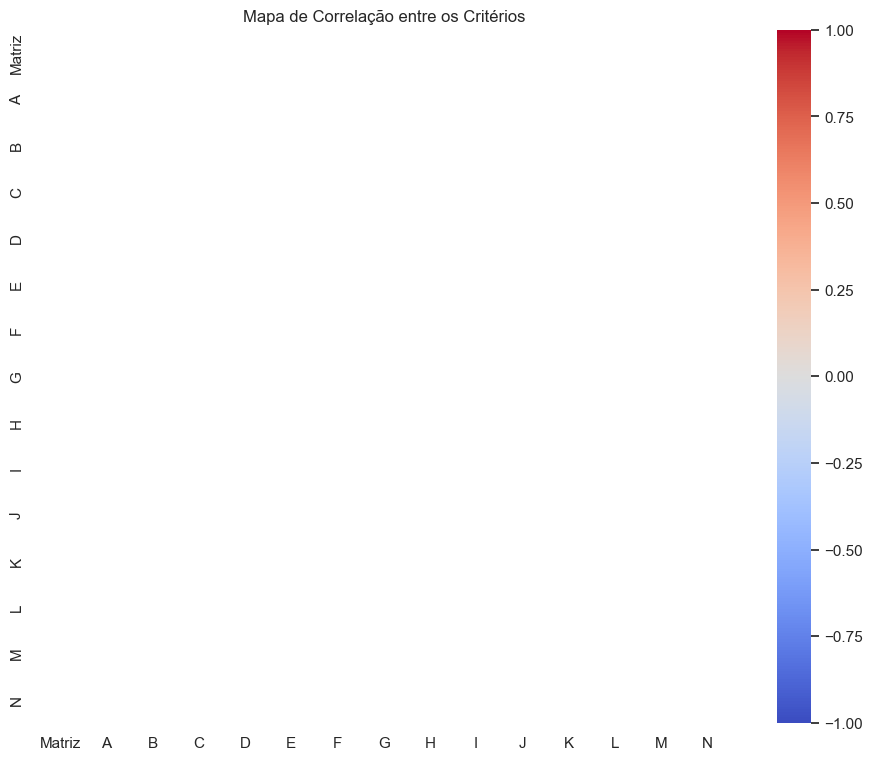

In [ ]:
# Definir as colunas renomeadas que queremos usar
criterios = [
    "Matriz", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"
]

# Converter as colunas de critérios para tipo float
df_por_regiao[criterios] = df_por_regiao[criterios].astype(float)

# Calcular a matriz de correlação
corrmat = df_por_regiao[criterios].corr()

# Criar a figura do heatmap de correlação
fig = plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(corrmat, dtype=bool))  # Máscara para ocultar a metade superior

# Criar o heatmap da matriz de correlação
sns.heatmap(corrmat, annot=True, mask=mask, cmap="coolwarm", vmax=1, vmin=-1, square=True, linewidths=0.5, fmt=".2f")

# Ajustar o título e exibir o gráfico
plt.title("Mapa de Correlação entre os Critérios")
plt.show()

## 10. Casos Mensais
Nesse tópico veremos a quantidade de relatórios publicados em cada mês ao longos dos anos.

In [ ]:
# Carregar o DataFrame
df = pd.read_csv("relatorios.csv")

# Converter a coluna 'Data' para string
df['Data'] = df['Data'].astype("string").str.strip()

# Substituir '#NULL' e valores vazios por NaN
df['Ano'] = df['Ano'].replace("#NULL!", pd.NA)
df = df.dropna(subset=['Ano'])  # Remover linhas onde 'Ano' é NaN

# Converter a coluna 'Ano' para int para evitar problemas posteriores
df['Ano'] = df['Ano'].astype(int)

# Criar um dicionário para armazenar as contagens por ano e por mês
contagens_ano_mes = {}

# Obter a lista de anos únicos (já sem #NULL)
anos = df['Ano'].unique()

# Iterar sobre cada ano para contar os meses
for ano in anos:
    # Filtrar o DataFrame para o ano atual
    df_ano = df[df['Ano'] == ano]

    # Contar quantas linhas contêm cada mês no ano atual
    quantidade_jan = df_ano['Data'].str.contains('jan', case=False, na=False).sum()
    quantidade_fev = df_ano['Data'].str.contains('fev', case=False, na=False).sum()
    quantidade_mar = df_ano['Data'].str.contains('mar', case=False, na=False).sum()
    quantidade_abr = df_ano['Data'].str.contains('abr', case=False, na=False).sum()
    quantidade_mai = df_ano['Data'].str.contains('mai', case=False, na=False).sum()
    quantidade_jun = df_ano['Data'].str.contains('jun', case=False, na=False).sum()
    quantidade_jul = df_ano['Data'].str.contains('jul', case=False, na=False).sum()
    quantidade_ago = df_ano['Data'].str.contains('ago', case=False, na=False).sum()
    quantidade_set = df_ano['Data'].str.contains('set', case=False, na=False).sum()
    quantidade_out = df_ano['Data'].str.contains('out', case=False, na=False).sum()
    quantidade_nov = df_ano['Data'].str.contains('nov', case=False, na=False).sum()
    quantidade_dez = df_ano['Data'].str.contains('dez', case=False, na=False).sum()

    # Armazenar os resultados em um dicionário usando o ano como chave
    contagens_ano_mes[ano] = {
        'jan': quantidade_jan,
        'fev': quantidade_fev,
        'mar': quantidade_mar,
        'abr': quantidade_abr,
        'mai': quantidade_mai,
        'jun': quantidade_jun,
        'jul': quantidade_jul,
        'ago': quantidade_ago,
        'set': quantidade_set,
        'out': quantidade_out,
        'nov': quantidade_nov,
        'dez': quantidade_dez
    }

# Converter o dicionário 'contagens_ano_mes' em um DataFrame
df_contagens = pd.DataFrame.from_dict(contagens_ano_mes, orient='index').reset_index()
df_contagens = df_contagens.rename(columns={'index': 'Ano'})

# Transformar o DataFrame para que tenhamos uma estrutura mais adequada para gráficos (long format)
df_contagens_long = df_contagens.melt(id_vars=['Ano'], var_name='Mês', value_name='Quantidade')

# Ordenar os meses de forma adequada
meses_ordenados = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
df_contagens_long['Mês'] = pd.Categorical(df_contagens_long['Mês'], categories=meses_ordenados, ordered=True)

# Ordenar os anos em ordem crescente
df_contagens_long = df_contagens_long.sort_values(by='Ano')

# Criar gráficos de barras para cada ano e exibir a distribuição de relatórios por mês
anos_unicos = sorted(df_contagens_long['Ano'].unique())

for ano in anos_unicos:
    df_ano = df_contagens_long[df_contagens_long['Ano'] == ano]
    
    fig = px.bar(df_ano, x='Mês', y='Quantidade',
                 title=f'Quantidade de Relatórios por Mês no Ano {ano}',
                 labels={'Mês': 'Mês', 'Quantidade': 'Número de Relatórios'},
                 text='Quantidade')
    
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis=dict(categoryorder='array', categoryarray=meses_ordenados),
                      yaxis_title='Número de Relatórios',
                      xaxis_title='Mês')
    
    # Exibir o gráfico
    fig.show()


## 11. Critérios Mensais
Aqui veremos a quais critérios estão mais presentes ao longos dos meses de cada anoa de relatórios publicados.

In [ ]:
# Carregar o DataFrame
df = pd.read_csv("relatorios.csv")

# Substituir valores #NULL! por NaN e remover apenas os espaços vazios
df = df.replace("#NULL!", pd.NA, regex=True)
df = df.replace("", pd.NA, regex=False)

# Definir os critérios
raw_data = ["Matriz de Achados?",
            "a. Questões de Auditoria",
            "b. Subquestões de Auditoria",
            "c. Descrição sumária",
            "d. Critério (O que deveria ser)",
            "e. Condição ou situação encontrada (O que é) [achados]",
            "f. Evidências",
            "g. Informação extraída das evidências",
            "h. Causas",
            "i. Efeitos",
            "j. Boas Práticas",
            "k. Recomendações",
            "l. Benefícios esperados",
            "m. Manifestação",
            "n. Conclusões"]

# Renomear as colunas para nomes mais curtos e legíveis
renomear_dict = {
    "Matriz de Achados?": "Matriz",
    "a. Questões de Auditoria": "A",
    "b. Subquestões de Auditoria": "B",
    "c. Descrição sumária": "C",
    "d. Critério (O que deveria ser)": "D",
    "e. Condição ou situação encontrada (O que é) [achados]": "E",
    "f. Evidências": "F",
    "g. Informação extraída das evidências": "G",
    "h. Causas": "H",
    "i. Efeitos": "I",
    "j. Boas Práticas": "J",
    "k. Recomendações": "K",
    "l. Benefícios esperados": "L",
    "m. Manifestação": "M",
    "n. Conclusões": "N"
}

# Renomear as colunas no DataFrame
df = df.rename(columns=renomear_dict)

# Converter as colunas renomeadas para tipo float, substituindo por NaN para valores inválidos
renamed_columns = list(renomear_dict.values())
df[renamed_columns] = df[renamed_columns].apply(pd.to_numeric, errors='coerce')

# Converter a coluna 'Data' para string e remover espaços extras
df['Data'] = df['Data'].astype("string").str.strip()

# Filtrar apenas os anos que não são NaN
df = df.dropna(subset=['Ano'])
df['Ano'] = df['Ano'].astype(int)  # Converter a coluna 'Ano' para int após remover os NaN

# Criar um DataFrame para armazenar as porcentagens de adoção dos critérios por mês e ano
contagens_criterios_mes_ano = []

# Obter a lista de anos únicos (já sem <NA>)
anos = df['Ano'].unique()

# Iterar sobre cada ano
for ano in anos:
    # Filtrar o DataFrame para o ano atual
    df_ano = df[df['Ano'] == ano]

    # Iterar sobre cada mês
    meses_ordenados = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
    for mes_nome in meses_ordenados:
        # Filtrar o DataFrame para o mês atual
        df_mes = df_ano[df_ano['Data'].str.contains(mes_nome, case=False, na=False)]

        # Quantidade total de relatórios no mês
        qtd_relatorios_mes = len(df_mes.index)

        # Inicializar o dicionário para armazenar as porcentagens dos critérios para este mês e ano
        porcentagens_mes = {'Ano': ano, 'Mês': mes_nome}

        # Calcular a porcentagem de cada critério
        for criterio in renamed_columns:
            if qtd_relatorios_mes > 0:
                # Calcular a quantidade de relatórios que atendem ao critério, ignorando valores NaN
                qtd_criterio = df_mes[criterio].eq(1).sum()
                porcentagem = round((qtd_criterio / qtd_relatorios_mes) * 100, 2)
            else:
                porcentagem = 0.0
            
            # Armazenar no dicionário
            porcentagens_mes[criterio] = porcentagem

        # Adicionar ao DataFrame principal
        contagens_criterios_mes_ano.append(porcentagens_mes)

# Converter o resultado em um DataFrame
df_criterios_mes_ano = pd.DataFrame(contagens_criterios_mes_ano)

# Ordenar os meses e anos
df_criterios_mes_ano['Mês'] = pd.Categorical(df_criterios_mes_ano['Mês'], categories=meses_ordenados, ordered=True)
df_criterios_mes_ano = df_criterios_mes_ano.sort_values(by=['Ano', 'Mês'])

# Transformar o DataFrame para formato longo (long format) para facilitar visualização
df_criterios_mes_ano_long = df_criterios_mes_ano.melt(id_vars=['Ano', 'Mês'], var_name='Critério', value_name='Porcentagem')

# Garantir que a coluna 'Porcentagem' é numérica e substituir NaN por 0
df_criterios_mes_ano_long['Porcentagem'] = df_criterios_mes_ano_long['Porcentagem'].fillna(0).astype(float)

# Criar gráficos de linhas para cada ano, exibindo todos os critérios
anos_unicos = df_criterios_mes_ano_long['Ano'].unique()

for ano in anos_unicos:
    df_ano = df_criterios_mes_ano_long[df_criterios_mes_ano_long['Ano'] == ano]
    
    # Criar gráfico para o ano atual com todos os critérios
    fig = px.line(df_ano, x='Mês', y='Porcentagem', color='Critério',
                  title=f'Porcentagem de Adoção dos Critérios por Mês no Ano {ano}',
                  labels={'Mês': 'Mês', 'Porcentagem': 'Porcentagem de Adoção (%)', 'Critério': 'Critério'},
                  markers=True)
    
    # Atualizar layout do gráfico para melhorar a visualização
    fig.update_layout(
        xaxis_title='Mês',
        yaxis_title='Porcentagem de Adoção (%)',
        legend_title='Critério',
        xaxis=dict(
            tickmode='array',
            tickvals=meses_ordenados,
            ticktext=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
        )
    )
    
    # Exibir o gráfico
    fig.show()

## 12. Casos na pandemia
Neste tópico investigaremos a quantidade de relatórios publicados antes, durante e depois da pandemia da Covid 19, afim de saber se a pandemia influenciou a produção de relatórios do país.

In [ ]:
# Definir os intervalos de tempo
ano_inicio = 2020
ano_fim = 2023
mes_inicio = 'mar'
mes_fim = 'mai'

# Filtrar o período de março de 2020 a maio de 2023
df_pandemia = df_contagens_long[(df_contagens_long['Ano'] >= ano_inicio) & (df_contagens_long['Ano'] <= ano_fim)]

# Função auxiliar para definir as condições de filtro para os meses
def filtro_mes(ano, mes):
    if ano == 2020:
        return mes in meses_ordenados[meses_ordenados.index(mes_inicio):]
    elif ano == 2023:
        return mes in meses_ordenados[:meses_ordenados.index(mes_fim) + 1]
    else:
        return True

# Aplicar o filtro de meses
df_pandemia = df_pandemia[df_pandemia.apply(lambda row: filtro_mes(row['Ano'], row['Mês']), axis=1)]

# Filtrar os relatórios antes de março de 2020
df_antes_pandemia = df_contagens_long[(df_contagens_long['Ano'] < ano_inicio) | 
                                     ((df_contagens_long['Ano'] == ano_inicio) & 
                                      (df_contagens_long['Mês'].apply(lambda x: meses_ordenados.index(x) < meses_ordenados.index(mes_inicio))))]

# Filtrar os relatórios depois de maio de 2023
df_depois_pandemia = df_contagens_long[(df_contagens_long['Ano'] > ano_fim) | 
                                      ((df_contagens_long['Ano'] == ano_fim) & 
                                       (df_contagens_long['Mês'].apply(lambda x: meses_ordenados.index(x) > meses_ordenados.index(mes_fim))))]

# Calcular as quantidades totais
total_antes = df_antes_pandemia['Quantidade'].sum()
total_durante = df_pandemia['Quantidade'].sum()
total_depois = df_depois_pandemia['Quantidade'].sum()

# Criar um DataFrame com os totais
df_totais = pd.DataFrame({
    'Período': ['Antes', 'Durante', 'Depois'],
    'Total Relatórios': [total_antes, total_durante, total_depois]
})

# Salvar o DataFrame com totais em um arquivo Excel
df_totais.to_excel('casos_pandemia.xlsx', index=False)

display(df_totais)


,Período,Total Relatórios
0,Antes,3237
1,Durante,1967
2,Depois,597
